<a href="https://colab.research.google.com/github/Coresight-Adithya/Automated-Projections/blob/main/China%20Retail%20Sales/Prophet%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 13.2 MB/s 
     |████████████████████████████████| 179 kB 59.7 MB/s 
     |████████████████████████████████| 73 kB 3.1 MB/s 
     |████████████████████████████████| 45 kB 3.9 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.4 which is incompatible.


In [ ]:
from prophet import Prophet
from pandas.tseries.offsets import MonthEnd
import pandas as pd
import numpy as np
from datetime import datetime

In [13]:
data_url ="https://raw.githubusercontent.com/Coresight-Adithya/Automated-Projections/main/China%20Retail%20Sales/China%20Sales.csv" 
data_name = "China Sales Total"
df = pd.read_csv(data_url)
print(df)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') + MonthEnd(1)
df.columns = ['ds', 'y']
df['y'] = df['y'].astype(float)
df = df.dropna()

           Date   Sales 
0    01-02-2011   2577.7
1    01-03-2011   1208.2
2    01-04-2011   1215.2
3    01-05-2011   1305.7
4    01-06-2011   1290.4
..          ...      ...
121  01-02-2022   6670.8
122  01-03-2022   3129.8
123  01-04-2022   2687.4
124  01-05-2022   3053.5
125  01-06-2022   3497.7

[126 rows x 2 columns]


In [14]:
# COVID Outliers
covid_outlier_st = datetime.strptime('2020-01-31', '%Y-%m-%d').date()
covid_outlier_en = datetime.strptime('2020-03-31', '%Y-%m-%d').date()

df.loc[(df['ds'].dt.date >= covid_outlier_st) & (df['ds'].dt.date <= covid_outlier_en), 'y'] = None

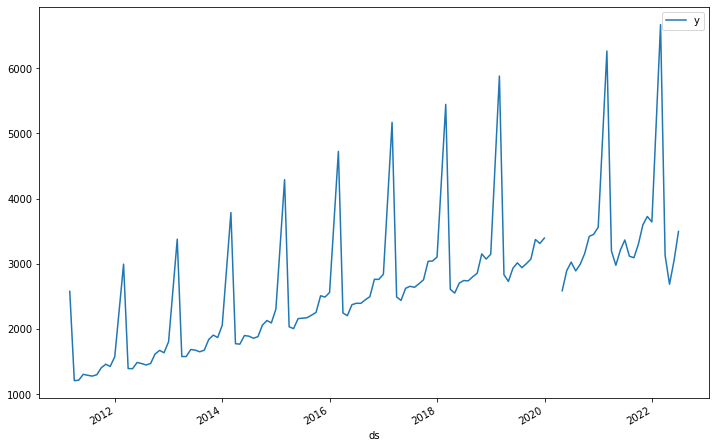

In [15]:
df.plot(x='ds', y='y', figsize=(12,8))

In [16]:
season_mode = "multiplicative"

In [17]:
# Facebook Prophet Model
model = Prophet(seasonality_mode=season_mode, daily_seasonality=False, weekly_seasonality=False)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp134if7uj/cc9wxnhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp134if7uj/65h5qs92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65604', 'data', 'file=/tmp/tmp134if7uj/cc9wxnhp.json', 'init=/tmp/tmp134if7uj/65h5qs92.json', 'output', 'file=/tmp/tmpjs675lip/prophet_model-20220721100430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:04:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:04:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make future dates
future = model.make_future_dataframe(periods=68, freq='M')

future = future[future['ds'].dt.year <= datetime.now().year+6]

future.to_csv("futuerdates.csv")

In [20]:
fut_url ="https://raw.githubusercontent.com/Coresight-Adithya/Automated-Projections/main/China%20Retail%20Sales/futuer_dates.csv" 
future = pd.read_csv(fut_url)
future
data_name = "China Sales Total"

In [21]:
# Forecast
forecast = model.predict(future)

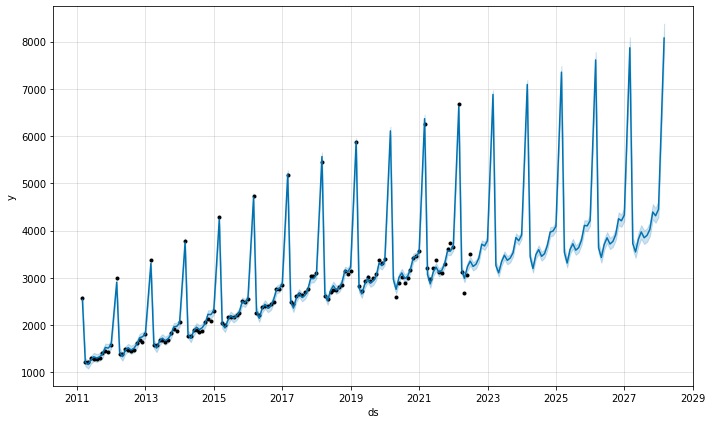

In [22]:
model.plot(forecast);

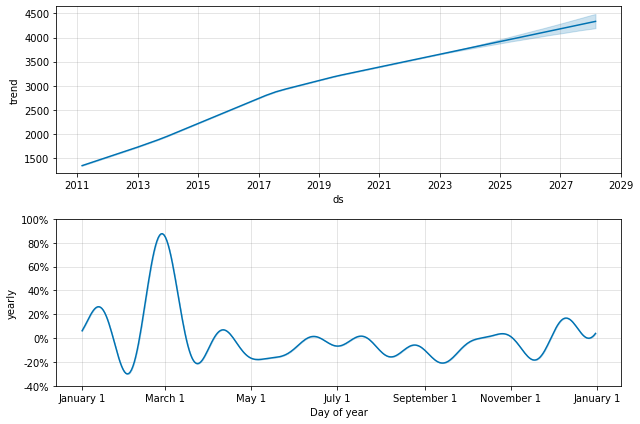

In [23]:
model.plot_components(forecast);

In [24]:

forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].to_csv(data_name+'-Prophet-Predictions.csv')